Loading Excel file...
Processing sheet: EV (Normal)
  Saved cleaned data to: F:\tesla-financial-modeling-portfolio\02_product_level_valuation\optimus_project\notebooks\visualizations\EV_Normal_cleaned.csv
Processing sheet: EV (Optimistic)
  Saved cleaned data to: F:\tesla-financial-modeling-portfolio\02_product_level_valuation\optimus_project\notebooks\visualizations\EV_Optimistic_cleaned.csv
Processing sheet: EV (Conservative)
  Saved cleaned data to: F:\tesla-financial-modeling-portfolio\02_product_level_valuation\optimus_project\notebooks\visualizations\EV_Conservative_cleaned.csv
Processing sheet: IRR Calculation
  Saved cleaned data to: F:\tesla-financial-modeling-portfolio\02_product_level_valuation\optimus_project\notebooks\visualizations\IRR_Calculation_cleaned.csv
Processing sheet: Investment Return Analysis
  Saved cleaned data to: F:\tesla-financial-modeling-portfolio\02_product_level_valuation\optimus_project\notebooks\visualizations\Investment_Return_Analysis_cleaned.csv
P

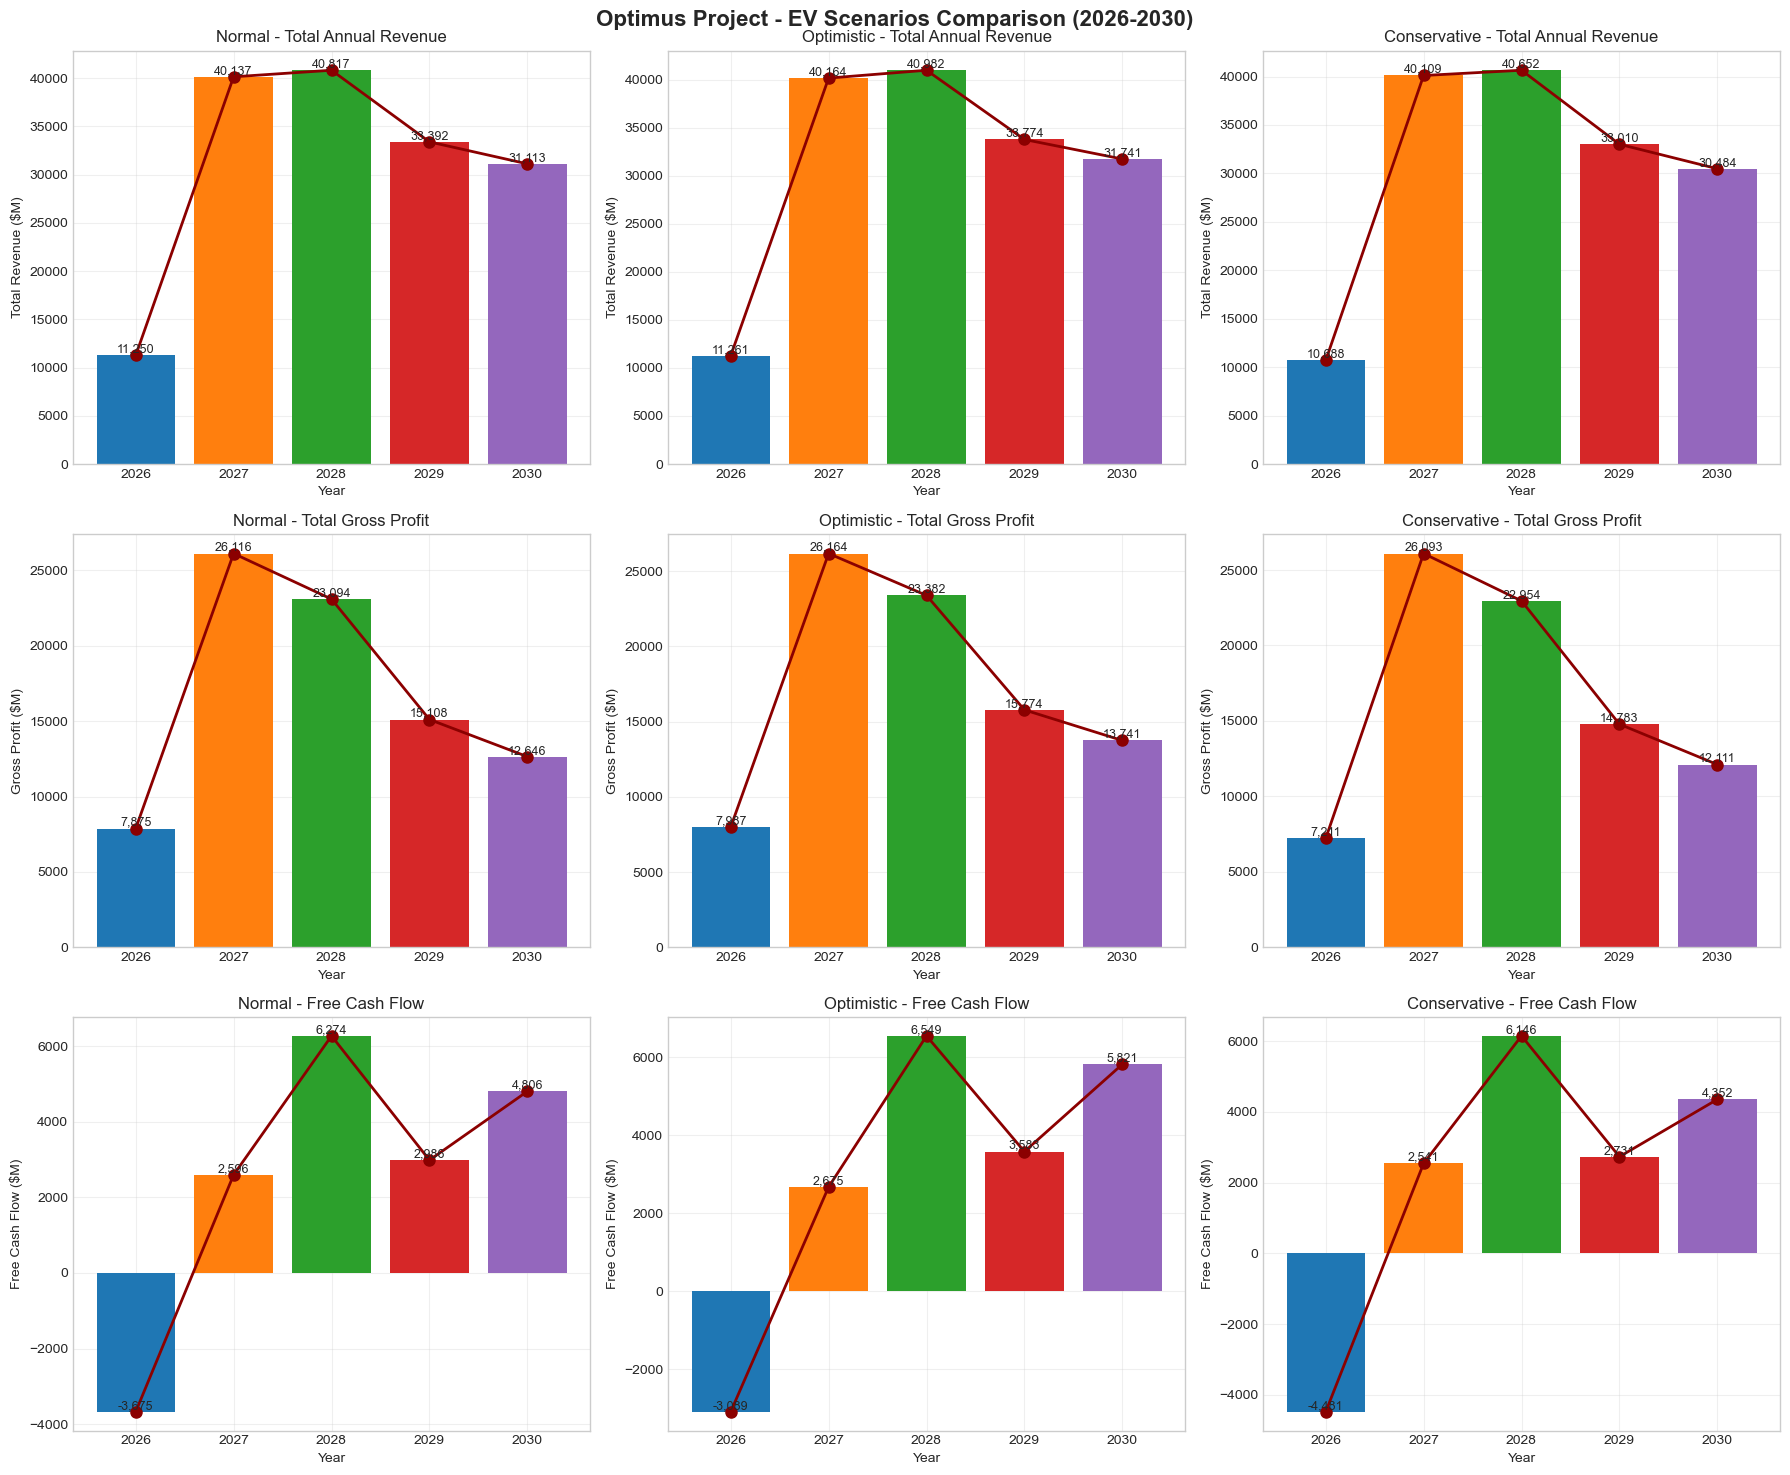

Creating IRR visualization...


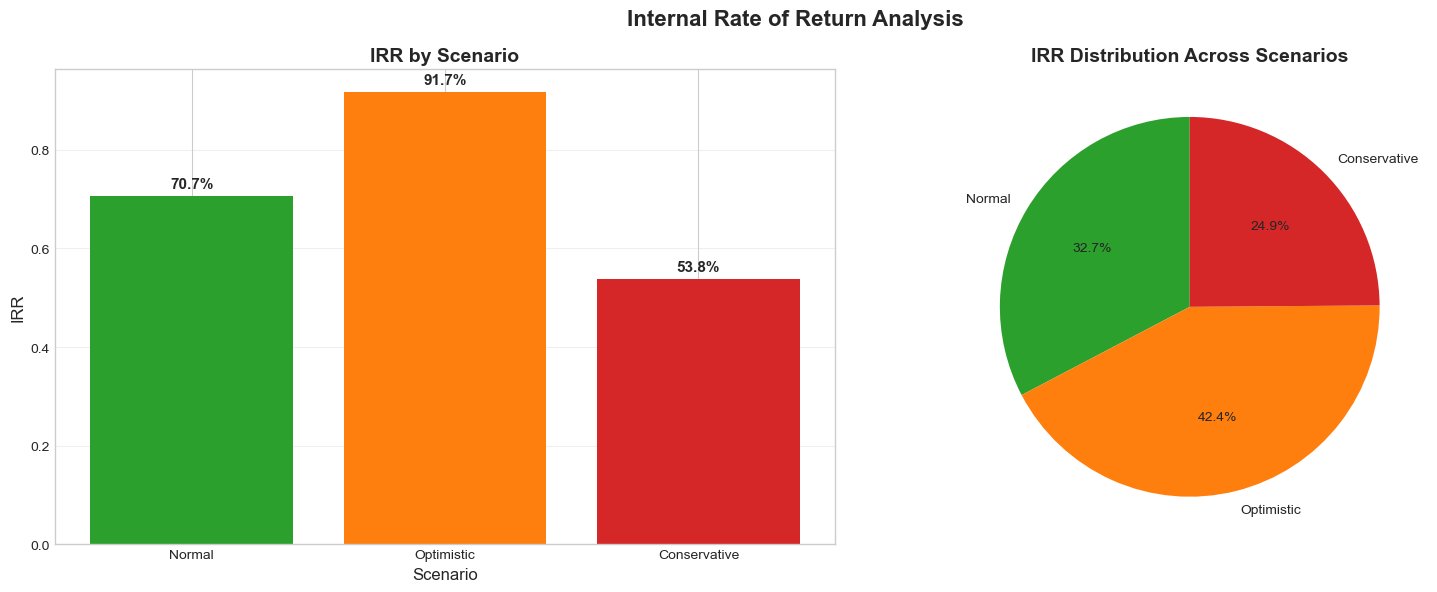

Creating Investment Return Analysis visualization...


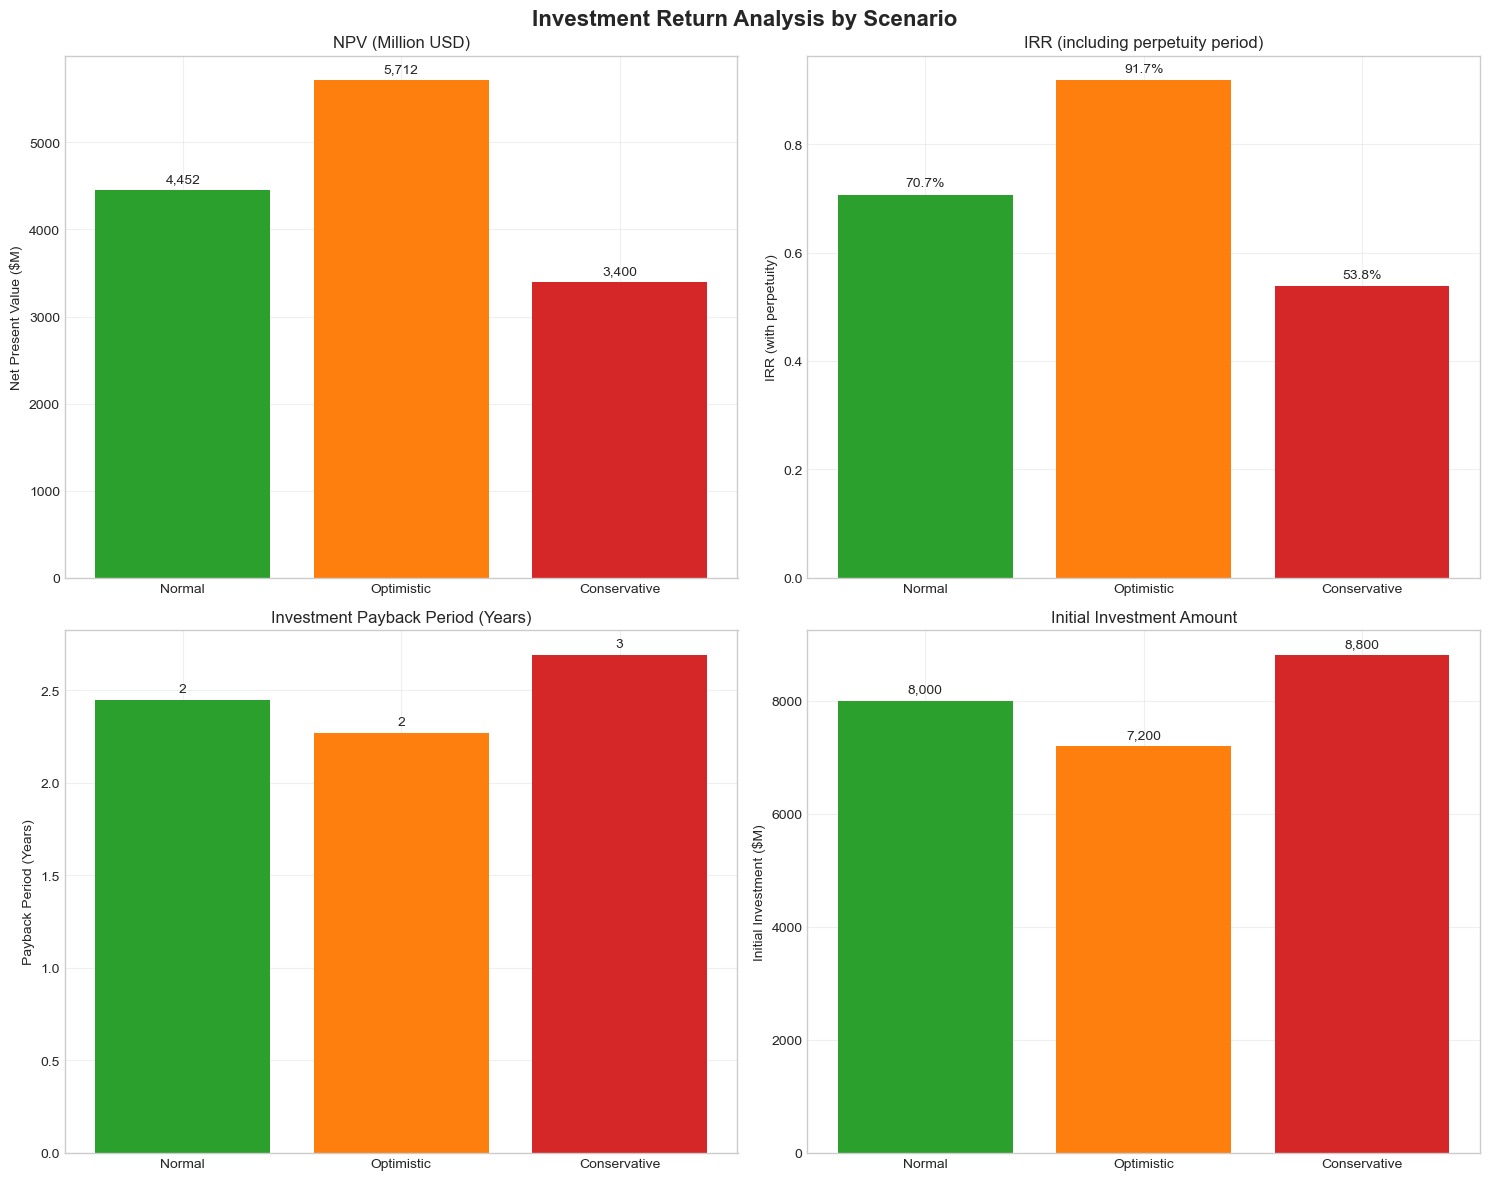

Creating Software Business visualization...


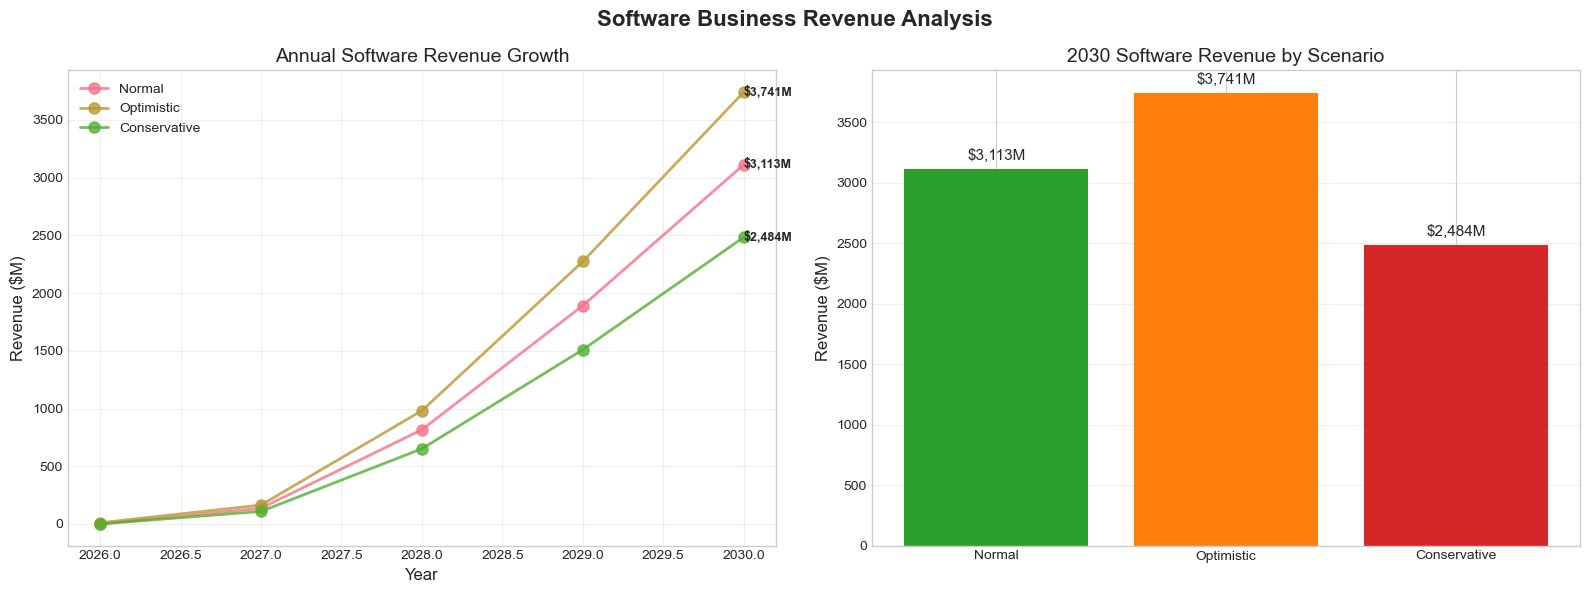

Creating enhanced Cost Curve visualization...


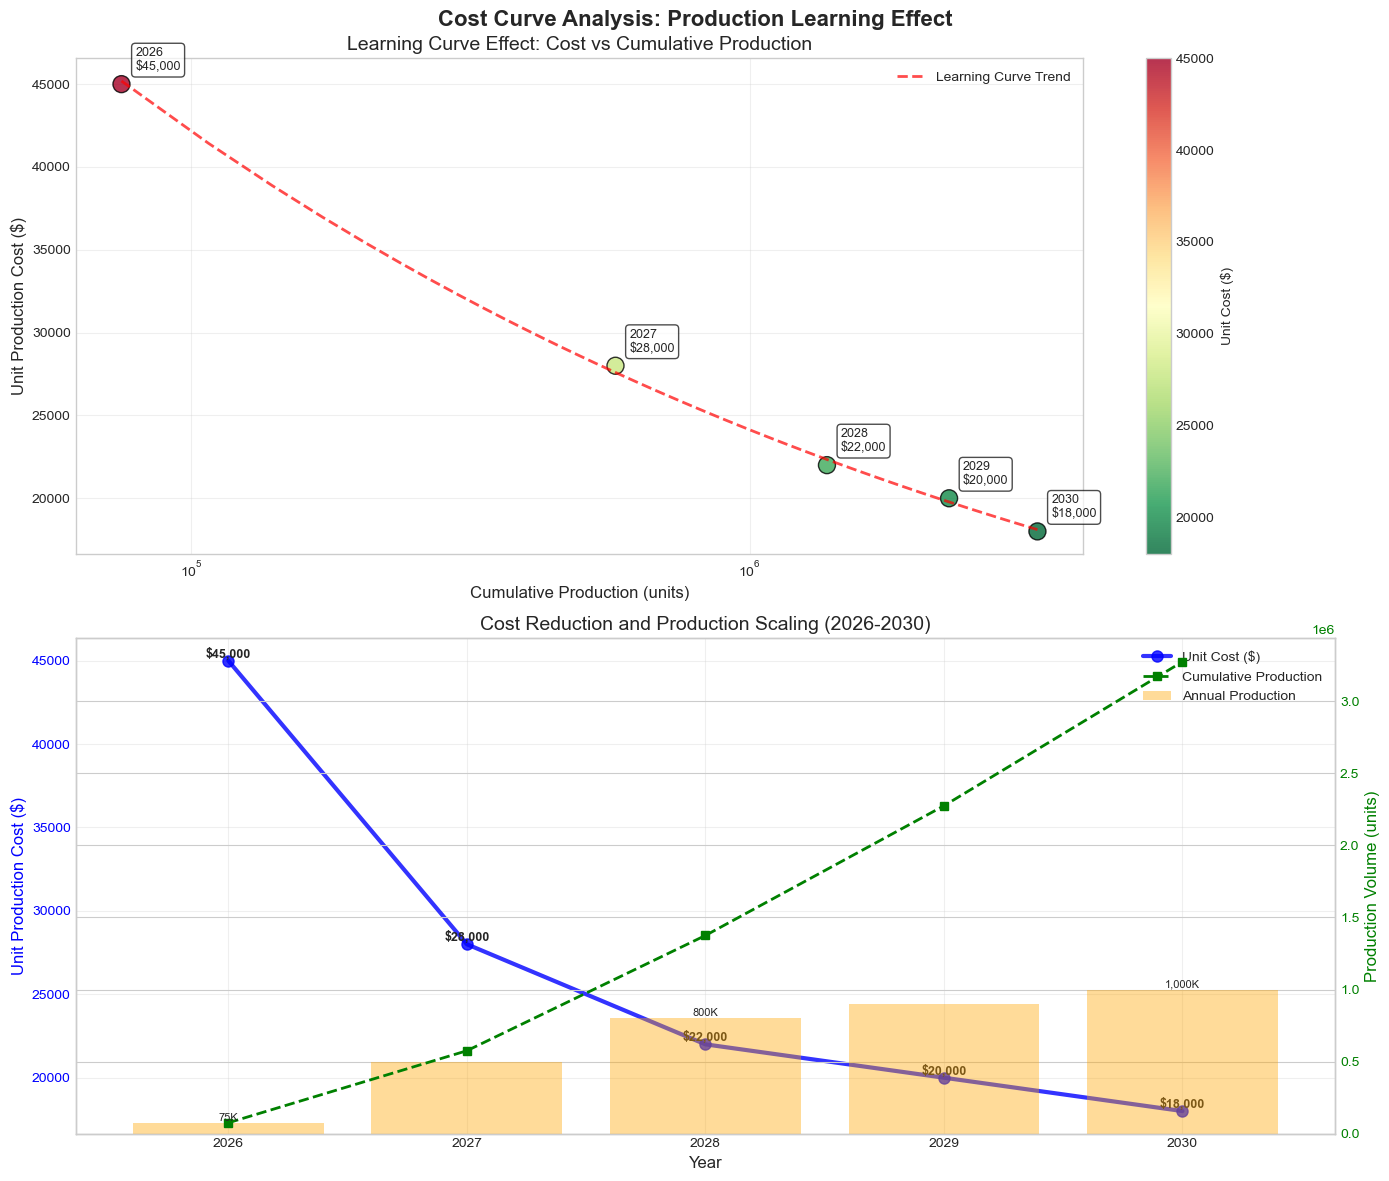

Creating comparative cost analysis...


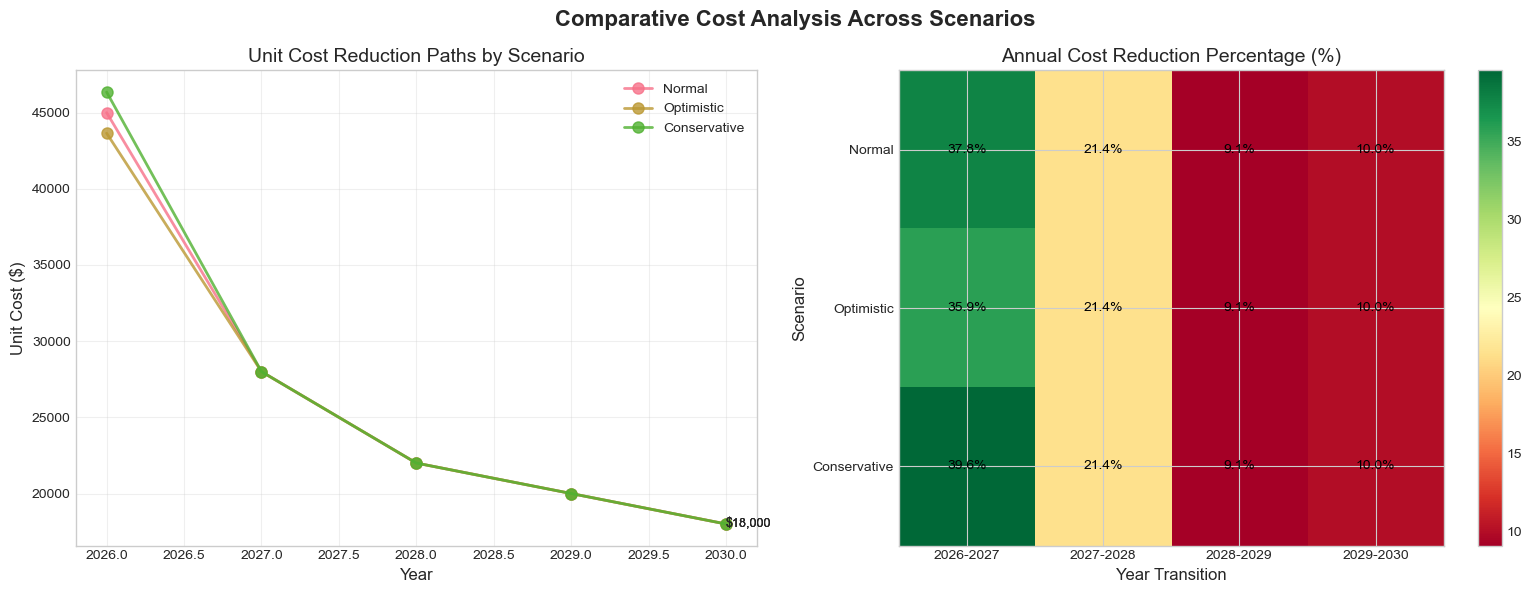

Creating simplified financial dashboard...


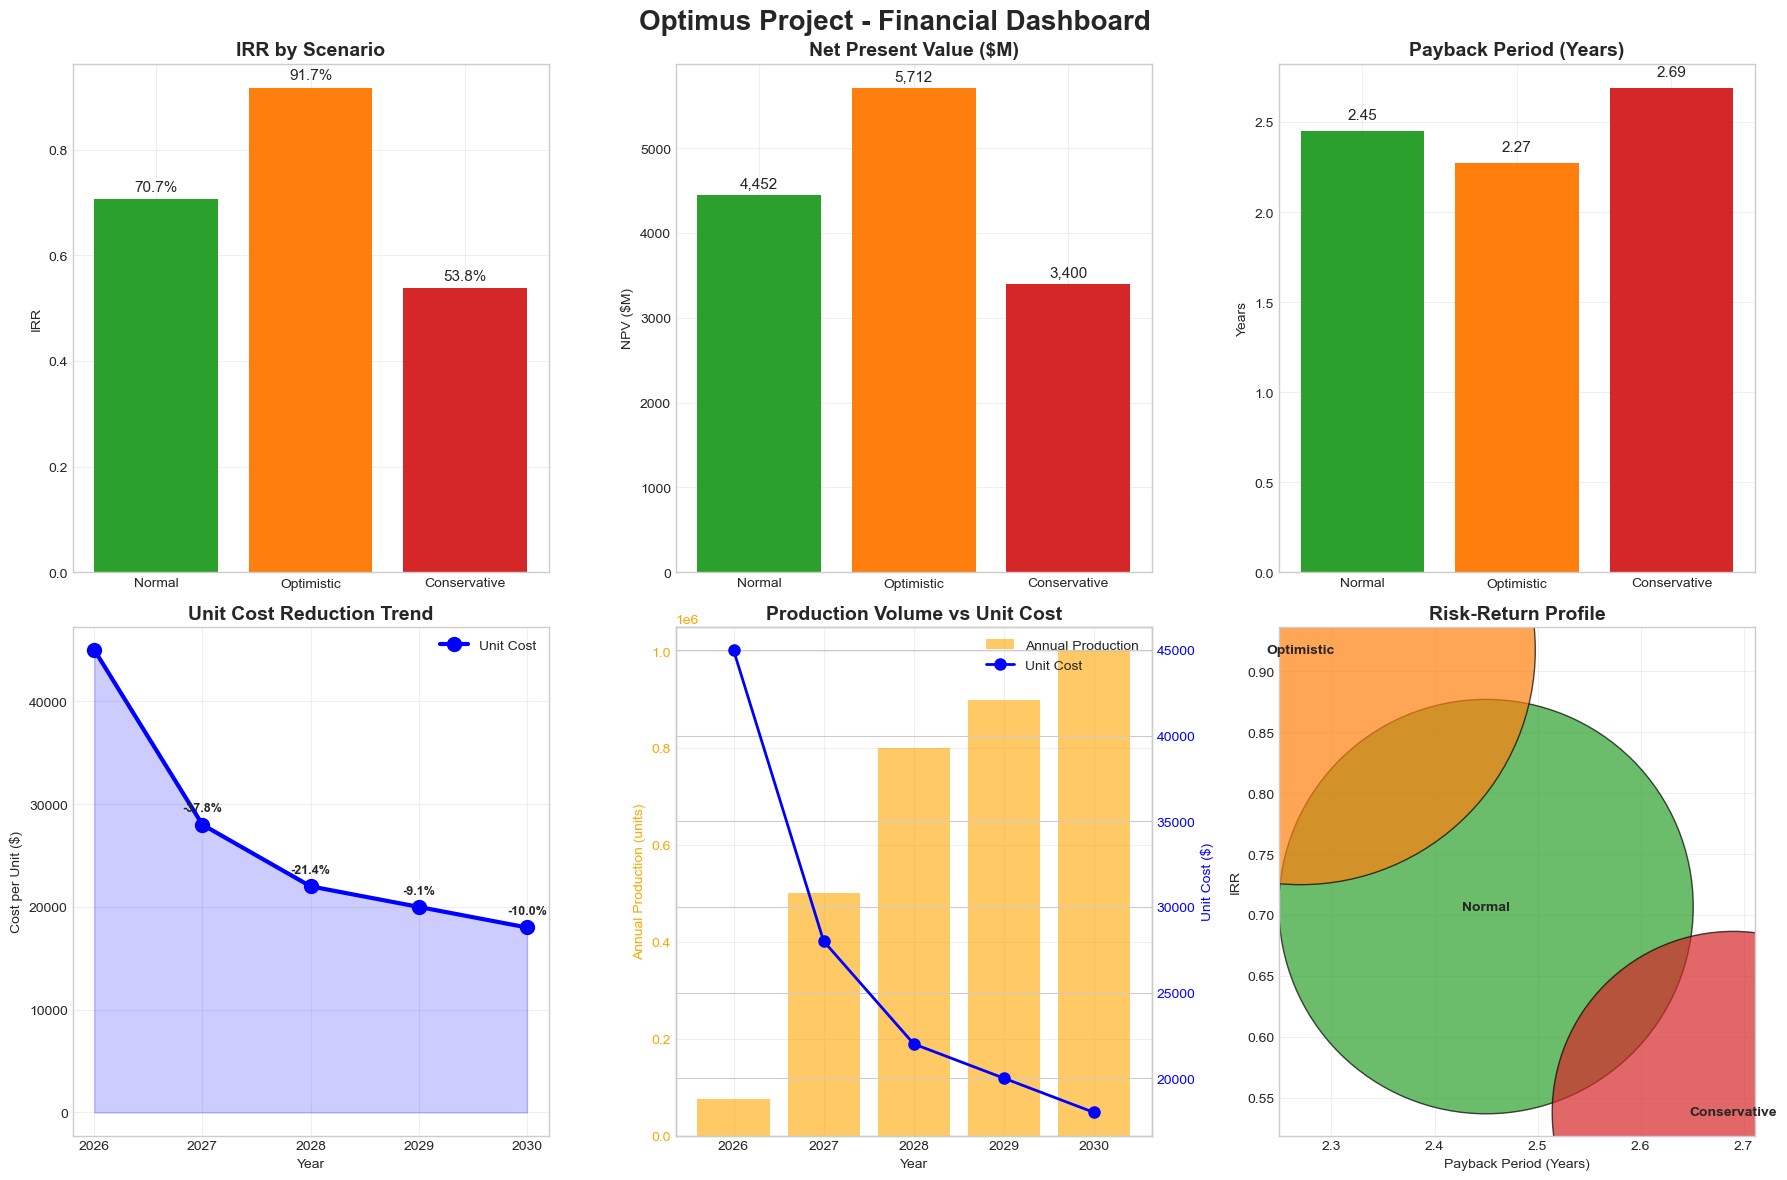

Creating learning curve analysis...


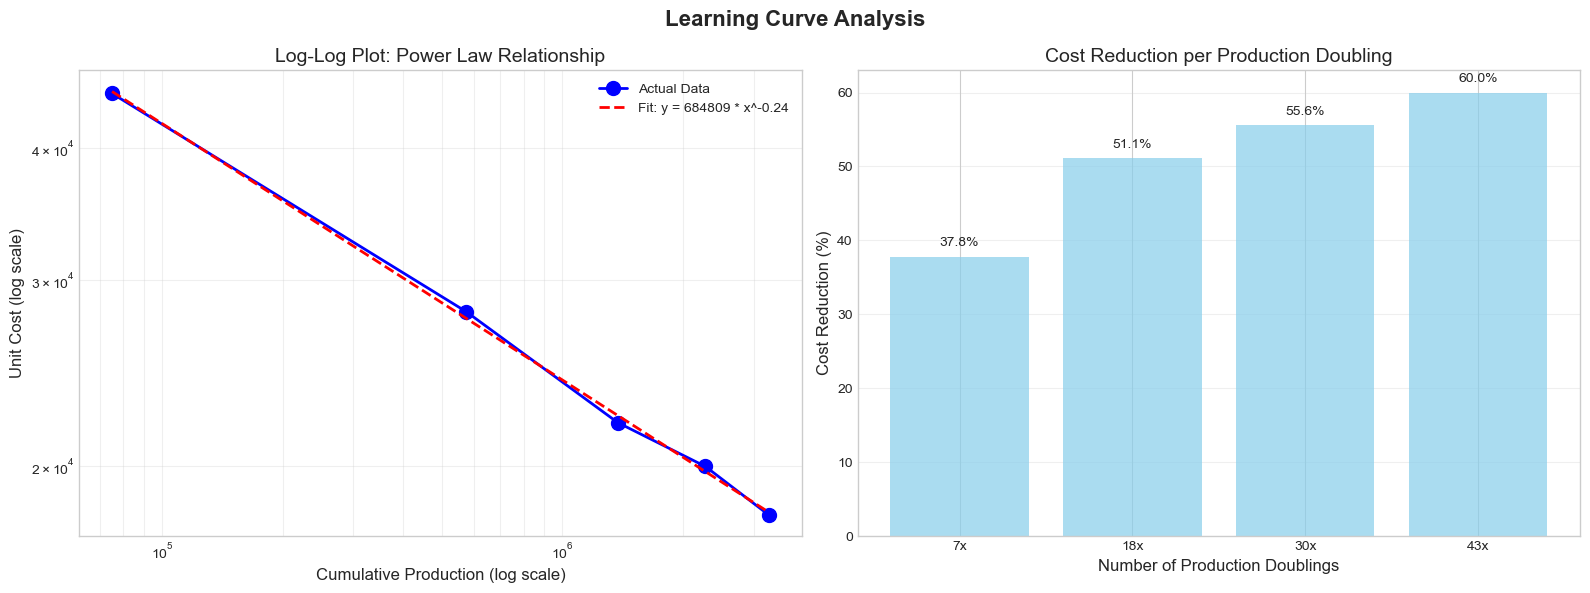


All visualizations have been saved to: F:\tesla-financial-modeling-portfolio\02_product_level_valuation\optimus_project\notebooks\visualizations
Cleaned CSV files are also available in the same directory.

Generating enhanced summary report...
Summary report saved to: F:\tesla-financial-modeling-portfolio\02_product_level_valuation\optimus_project\notebooks\visualizations\analysis_summary.txt

Enhanced analysis complete!

Generated files:
1. 12 visualization files
2. 7 cleaned CSV files
3. 1 comprehensive analysis summary


In [5]:
# file_cleanup_and_viz_enhanced_final.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ------------------------------
# 1. Setup Relative Paths
# ------------------------------
project_root = Path.cwd()  # Assuming this script is in the project root
data_folder = project_root / "F:/tesla-financial-modeling-portfolio/02_product_level_valuation/optimus_project/models"

# If the above path is not accessible, try a relative approach
if not data_folder.exists():
    # Try to find the file in the same directory as script or one level up
    script_dir = Path(__file__).parent
    possible_paths = [
        script_dir / "09_Optimus_DCF.xlsx",
        script_dir.parent / "models" / "09_Optimus_DCF.xlsx",
        script_dir / "data" / "09_Optimus_DCF.xlsx"
    ]
    
    file_path = None
    for p in possible_paths:
        if p.exists():
            file_path = p
            break
    
    if file_path is None:
        raise FileNotFoundError("Could not find the Excel file. Please check the file location.")
else:
    file_path = data_folder / "09_Optimus_DCF.xlsx"

# Create output directory for visualizations
output_dir = project_root / "visualizations"
output_dir.mkdir(exist_ok=True)

# ------------------------------
# 2. Load and Clean Data
# ------------------------------
print("Loading Excel file...")
excel_file = pd.ExcelFile(file_path)

# Define the sheets we want to process
target_sheets = [
    'EV (Normal)', 'EV (Optimistic)', 'EV (Conservative)',
    'IRR Calculation', 'Investment Return Analysis',
    'Software Business', 'Cost Curve'
]

# Dictionary to store cleaned dataframes
cleaned_dfs = {}

for sheet in target_sheets:
    print(f"Processing sheet: {sheet}")
    df = pd.read_excel(excel_file, sheet_name=sheet, header=None)  # No header initially
    
    # Basic cleaning
    # Remove rows with all NaN
    df_clean = df.dropna(how='all')
    
    # Remove columns with all NaN
    df_clean = df_clean.dropna(axis=1, how='all')
    
    # Reset index
    df_clean = df_clean.reset_index(drop=True)
    
    cleaned_dfs[sheet] = df_clean
    
    # Save cleaned data to CSV
    csv_path = output_dir / f"{sheet.replace(' ', '_').replace('(', '').replace(')', '')}_cleaned.csv"
    df_clean.to_csv(csv_path, index=False, encoding='utf-8-sig')
    print(f"  Saved cleaned data to: {csv_path}")

print(f"\nSuccessfully cleaned {len(cleaned_dfs)} sheets.")

# ------------------------------
# 3. Define Data for Visualizations (from Excel file)
# ------------------------------
print("\nPreparing data for visualizations...")

# Define years
years = [2026, 2027, 2028, 2029, 2030]
scenarios = ['Normal', 'Optimistic', 'Conservative']

# EV Data
ev_data = {
    'Total Annual Revenue': {
        'Normal': [11250, 40136.6, 40816.8, 33391.9, 31112.6],
        'Optimistic': [11260.7, 40164.2, 40981.8, 33774.1, 31741.4],
        'Conservative': [10687.5, 40109, 40651.8, 33009.7, 30483.8]
    },
    'Total Gross Profit': {
        'Normal': [7875, 26116.1, 23094.2, 15108.1, 12645.7],
        'Optimistic': [7986.96, 26164.2, 23381.8, 15774.1, 13741.4],
        'Conservative': [7211.25, 26092.7, 22954, 14783.2, 12111.2]
    },
    'Free Cash Flow': {
        'Normal': [-3675, 2595.66, 6273.62, 2986.22, 4805.8],
        'Optimistic': [-3089.47, 2675.17, 6548.59, 3582.76, 5820.94],
        'Conservative': [-4481.25, 2540.78, 6145.9, 2730.79, 4351.87]
    }
}

# IRR Data
irr_values = [0.70688, 0.917364, 0.538029]

# Investment Return Analysis Data
investment_data = {
    'NPV (Million USD)': [4451.7, 5711.5, 3399.9],
    'IRR (including perpetuity period)': [0.7069, 0.9174, 0.5380],
    'Investment Payback Period (Years)': [2.45, 2.27, 2.69],
    'Initial Investment Amount': [8000, 7200, 8800]
}

# Software Business Data
software_revenue_data = {
    'Normal': [0, 136.62, 816.75, 1891.89, 3112.56],
    'Optimistic': [10.71, 164.22, 981.75, 2274.09, 3741.36],
    'Conservative': [0, 109.02, 651.75, 1509.69, 2483.76]
}

# Cost Curve Data
cost_data = {
    'Normal': {
        'unit_costs': [45000, 28000, 22000, 20000, 18000],
        'annual_production': [75000, 500000, 800000, 900000, 1000000],
        'cumulative_production': [75000, 575000, 1375000, 2275000, 3275000]
    },
    'Optimistic': {
        'unit_costs': [43650, 28000, 22000, 20000, 18000],
        'annual_production': [75000, 500000, 800000, 900000, 1000000],
        'cumulative_production': [75000, 575000, 1375000, 2275000, 3275000]
    },
    'Conservative': {
        'unit_costs': [46350, 28000, 22000, 20000, 18000],
        'annual_production': [75000, 500000, 800000, 900000, 1000000],
        'cumulative_production': [75000, 575000, 1375000, 2275000, 3275000]
    }
}

# Use Normal scenario as representative for some charts
normal_unit_costs = cost_data['Normal']['unit_costs']
normal_annual_production = cost_data['Normal']['annual_production']
normal_cumulative_production = cost_data['Normal']['cumulative_production']

print("Data preparation complete.")

# ------------------------------
# 4. Create Enhanced Visualizations
# ------------------------------
print("\nCreating enhanced visualizations...")

# 4.1 Enhanced Visualization for EV Scenarios
print("Creating EV Scenarios visualization...")
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Optimus Project - EV Scenarios Comparison (2026-2030)', fontsize=16, fontweight='bold')

# Define the metrics to visualize for EV sheets
ev_metrics_list = [
    ('Total Annual Revenue', 'Total Revenue ($M)'),
    ('Total Gross Profit', 'Gross Profit ($M)'),
    ('Free Cash Flow', 'Free Cash Flow ($M)')
]

for col_idx, scenario_name in enumerate(scenarios):
    for row_idx, (metric, ylabel) in enumerate(ev_metrics_list):
        ax = axes[row_idx, col_idx]
        values = ev_data[metric][scenario_name]
        
        # Create bar chart with line overlay
        x_pos = np.arange(len(years))
        bars = ax.bar(x_pos, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
        
        # Add line chart overlay
        ax.plot(x_pos, values, color='darkred', marker='o', linewidth=2, markersize=8)
        
        ax.set_title(f'{scenario_name} - {metric}', fontsize=12)
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        ax.set_xticks(x_pos)
        ax.set_xticklabels([str(year) for year in years])
        ax.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, v in enumerate(values):
            ax.text(x_pos[i], v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(output_dir / 'EV_Scenarios_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.2 Enhanced Visualization for IRR Calculation
print("Creating IRR visualization...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Internal Rate of Return Analysis', fontsize=16, fontweight='bold')

# Plot 1: Bar chart
bars = ax1.bar(scenarios, irr_values, color=['#2ca02c', '#ff7f0e', '#d62728'])
ax1.set_title('IRR by Scenario', fontsize=14, fontweight='bold')
ax1.set_ylabel('IRR', fontsize=12)
ax1.set_xlabel('Scenario', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars, irr_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{val:.1%}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Pie chart for IRR distribution
ax2.pie(irr_values, labels=scenarios, autopct='%1.1f%%', 
        colors=['#2ca02c', '#ff7f0e', '#d62728'], startangle=90)
ax2.set_title('IRR Distribution Across Scenarios', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / 'IRR_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.3 Fixed Visualization for Investment Return Analysis
print("Creating Investment Return Analysis visualization...")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Investment Return Analysis by Scenario', fontsize=16, fontweight='bold')

# Define metrics configuration
metrics_config = [
    ('NPV (Million USD)', 'Net Present Value ($M)', 0, 0),
    ('IRR (including perpetuity period)', 'IRR (with perpetuity)', 0, 1),
    ('Investment Payback Period (Years)', 'Payback Period (Years)', 1, 0),
    ('Initial Investment Amount', 'Initial Investment ($M)', 1, 1)
]

# Create visualizations
for metric_name, ylabel, row_idx, col_idx in metrics_config:
    ax = axes[row_idx, col_idx]
    values = investment_data[metric_name]
    
    if 'IRR' in metric_name:
        # For IRR, use percentage format
        bars = ax.bar(scenarios, values, color=['#2ca02c', '#ff7f0e', '#d62728'])
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{val:.1%}', ha='center', va='bottom', fontsize=10)
    else:
        # For other metrics, use regular numbers
        x_pos = np.arange(len(scenarios))
        bars = ax.bar(x_pos, values, color=['#2ca02c', '#ff7f0e', '#d62728'])
        ax.set_xticks(x_pos)
        ax.set_xticklabels(scenarios)
        
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + (0.01 * max(values)),
                   f'{val:,.0f}', ha='center', va='bottom', fontsize=10)
    
    ax.set_title(metric_name, fontsize=12)
    ax.set_ylabel(ylabel)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'Investment_Return_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.4 Enhanced Visualization for Software Business
print("Creating Software Business visualization...")

# Create stacked area chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Software Business Revenue Analysis', fontsize=16, fontweight='bold')

# Plot 1: Line chart with markers
for scenario, values in software_revenue_data.items():
    ax1.plot(years, values, marker='o', linewidth=2, markersize=8, 
            label=scenario, alpha=0.8)
    
    # Add data labels for last point
    ax1.text(years[-1], values[-1], f'${values[-1]:,.0f}M', 
            ha='left', va='center', fontsize=9, fontweight='bold')

ax1.set_title('Annual Software Revenue Growth', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Revenue ($M)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Stacked bar chart for 2030 revenue
revenue_2030 = [software_revenue_data[s][-1] for s in scenarios]
bars = ax2.bar(scenarios, revenue_2030, color=['#2ca02c', '#ff7f0e', '#d62728'])
ax2.set_title('2030 Software Revenue by Scenario', fontsize=14)
ax2.set_ylabel('Revenue ($M)', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, val in enumerate(revenue_2030):
    ax2.text(i, val + 50, f'${val:,.0f}M', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig(output_dir / 'Software_Revenue_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.5 ENHANCED Visualization for Cost Curve - Combination Chart
print("Creating enhanced Cost Curve visualization...")

# Create combination chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
fig.suptitle('Cost Curve Analysis: Production Learning Effect', fontsize=16, fontweight='bold')

# Plot 1: Unit Cost vs Cumulative Production (Scatter with trend line)
scatter1 = ax1.scatter(normal_cumulative_production, normal_unit_costs, s=150, 
                      c=normal_unit_costs, cmap='RdYlGn_r', edgecolors='black', alpha=0.8)

# Add trend line (power law - typical for learning curves)
x_fit = np.linspace(min(normal_cumulative_production), max(normal_cumulative_production), 100)
# Fit a power law: y = a * x^b
log_x = np.log(normal_cumulative_production)
log_y = np.log(normal_unit_costs)
coeffs = np.polyfit(log_x, log_y, 1)
y_fit = np.exp(coeffs[1]) * x_fit ** coeffs[0]

ax1.plot(x_fit, y_fit, 'r--', linewidth=2, alpha=0.7, label='Learning Curve Trend')

# Add annotations
for i, (x, y, year) in enumerate(zip(normal_cumulative_production, normal_unit_costs, years)):
    ax1.annotate(f'{year}\n${y:,.0f}', 
                xy=(x, y), 
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

ax1.set_xlabel('Cumulative Production (units)', fontsize=12)
ax1.set_ylabel('Unit Production Cost ($)', fontsize=12)
ax1.set_title('Learning Curve Effect: Cost vs Cumulative Production', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xscale('log')  # Log scale to better show learning curve

# Add colorbar
cbar = plt.colorbar(scatter1, ax=ax1)
cbar.set_label('Unit Cost ($)', fontsize=10)

# Plot 2: Dual axis chart - Cost reduction and production growth
ax2_primary = ax2
ax2_secondary = ax2_primary.twinx()

# Line for unit cost (left axis) - Fixed: remove redundant color parameter
cost_line, = ax2_primary.plot(years, normal_unit_costs, 'b-o', linewidth=3, markersize=8, 
                             label='Unit Cost ($)', alpha=0.8)

# Bars for annual production (right axis)
production_bars = ax2_secondary.bar(years, normal_annual_production, alpha=0.4, 
                                   color='orange', label='Annual Production')

# Line for cumulative production (right axis)
cumulative_line, = ax2_secondary.plot(years, normal_cumulative_production, 'g--s', 
                                     linewidth=2, markersize=6, 
                                     label='Cumulative Production')

ax2_primary.set_xlabel('Year', fontsize=12)
ax2_primary.set_ylabel('Unit Production Cost ($)', fontsize=12, color='blue')
ax2_primary.tick_params(axis='y', labelcolor='blue')
ax2_primary.grid(True, alpha=0.3)

ax2_secondary.set_ylabel('Production Volume (units)', fontsize=12, color='green')
ax2_secondary.tick_params(axis='y', labelcolor='green')

ax2_primary.set_title('Cost Reduction and Production Scaling (2026-2030)', fontsize=14)

# Combine legends from both axes
lines1, labels1 = ax2_primary.get_legend_handles_labels()
lines2, labels2 = ax2_secondary.get_legend_handles_labels()
ax2_primary.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add value annotations
for i, (year, cost, ann_prod) in enumerate(zip(years, normal_unit_costs, normal_annual_production)):
    ax2_primary.text(year, cost, f'${cost:,.0f}', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    if i % 2 == 0:  # Annotate every other bar to avoid clutter
        ax2_secondary.text(year, ann_prod, f'{ann_prod/1000:,.0f}K', 
                          ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig(output_dir / 'Cost_Curve_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.6 Additional: Comparative Cost Analysis across Scenarios
print("Creating comparative cost analysis...")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparative Cost Analysis Across Scenarios', fontsize=16, fontweight='bold')

# Plot 1: Cost reduction paths
for scenario in scenarios:
    costs = cost_data[scenario]['unit_costs']
    axes[0].plot(years, costs, marker='o', linewidth=2, markersize=8, 
                label=scenario, alpha=0.8)
    
    # Add final cost label
    axes[0].text(years[-1], costs[-1], f'${costs[-1]:,.0f}', 
                ha='left', va='center', fontsize=9)

axes[0].set_title('Unit Cost Reduction Paths by Scenario', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Unit Cost ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Heatmap of cost reduction percentages
cost_reduction_pct = []
for scenario in scenarios:
    costs = cost_data[scenario]['unit_costs']
    reduction = [(costs[i-1] - costs[i]) / costs[i-1] * 100 
                for i in range(1, len(costs))]
    cost_reduction_pct.append(reduction)

# Create heatmap
im = axes[1].imshow(cost_reduction_pct, cmap='RdYlGn', aspect='auto')

axes[1].set_title('Annual Cost Reduction Percentage (%)', fontsize=14)
axes[1].set_xlabel('Year Transition', fontsize=12)
axes[1].set_ylabel('Scenario', fontsize=12)

# Set ticks
axes[1].set_xticks(np.arange(len(years)-1))
axes[1].set_xticklabels([f'{years[i]}-{years[i+1]}' for i in range(len(years)-1)])
axes[1].set_yticks(np.arange(len(scenarios)))
axes[1].set_yticklabels(scenarios)

# Add text annotations
for i in range(len(scenarios)):
    for j in range(len(years)-1):
        text = axes[1].text(j, i, f'{cost_reduction_pct[i][j]:.1f}%',
                           ha="center", va="center", color="black", fontsize=10)

# Add colorbar
plt.colorbar(im, ax=axes[1])

plt.tight_layout()
plt.savefig(output_dir / 'Comparative_Cost_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.7 Simplified Financial Dashboard (without complex layout)
print("Creating simplified financial dashboard...")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Optimus Project - Financial Dashboard', fontsize=20, fontweight='bold')

# 1. IRR Comparison
ax1 = axes[0, 0]
bars = ax1.bar(scenarios, irr_values, color=['#2ca02c', '#ff7f0e', '#d62728'])
ax1.set_title('IRR by Scenario', fontsize=14, fontweight='bold')
ax1.set_ylabel('IRR')
ax1.grid(True, alpha=0.3)
for bar, val in zip(bars, irr_values):
    ax1.text(bar.get_x() + bar.get_width()/2., val + 0.01, f'{val:.1%}', 
            ha='center', va='bottom', fontsize=11)

# 2. NPV Comparison
ax2 = axes[0, 1]
npv_values_chart = investment_data['NPV (Million USD)']
bars = ax2.bar(scenarios, npv_values_chart, color=['#2ca02c', '#ff7f0e', '#d62728'])
ax2.set_title('Net Present Value ($M)', fontsize=14, fontweight='bold')
ax2.set_ylabel('NPV ($M)')
ax2.grid(True, alpha=0.3)
for bar, val in zip(bars, npv_values_chart):
    ax2.text(bar.get_x() + bar.get_width()/2., val + 50, f'{val:,.0f}', 
            ha='center', va='bottom', fontsize=11)

# 3. Payback Period Comparison
ax3 = axes[0, 2]
payback_values_chart = investment_data['Investment Payback Period (Years)']
bars = ax3.bar(scenarios, payback_values_chart, color=['#2ca02c', '#ff7f0e', '#d62728'])
ax3.set_title('Payback Period (Years)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Years')
ax3.grid(True, alpha=0.3)
for bar, val in zip(bars, payback_values_chart):
    ax3.text(bar.get_x() + bar.get_width()/2., val + 0.05, f'{val:.2f}', 
            ha='center', va='bottom', fontsize=11)

# 4. Cost Reduction Trend
ax4 = axes[1, 0]
x_pos = np.arange(len(years))
ax4.plot(x_pos, normal_unit_costs, color='blue', marker='o', linewidth=3, 
         markersize=10, label='Unit Cost')
ax4.fill_between(x_pos, 0, normal_unit_costs, alpha=0.2, color='blue')
ax4.set_title('Unit Cost Reduction Trend', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Cost per Unit ($)')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([str(year) for year in years])
ax4.grid(True, alpha=0.3)
ax4.legend()

# Add cost reduction percentages
for i in range(1, len(normal_unit_costs)):
    reduction_pct = (normal_unit_costs[i-1] - normal_unit_costs[i]) / normal_unit_costs[i-1] * 100
    ax4.text(x_pos[i], normal_unit_costs[i] + 1000, f'-{reduction_pct:.1f}%', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# 5. Production vs Cost
ax5 = axes[1, 1]
ax5_secondary = ax5.twinx()

# Production bars
bars = ax5.bar(x_pos, normal_annual_production, alpha=0.6, color='orange', label='Annual Production')
ax5.set_xlabel('Year')
ax5.set_ylabel('Annual Production (units)', color='orange')
ax5.tick_params(axis='y', labelcolor='orange')
ax5.set_xticks(x_pos)
ax5.set_xticklabels([str(year) for year in years])

# Cost line - Fixed: remove redundant color parameter
line = ax5_secondary.plot(x_pos, normal_unit_costs, marker='o', linewidth=2, 
                         markersize=8, label='Unit Cost', color='blue')
ax5_secondary.set_ylabel('Unit Cost ($)', color='blue')
ax5_secondary.tick_params(axis='y', labelcolor='blue')

ax5.set_title('Production Volume vs Unit Cost', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax5.get_legend_handles_labels()
lines2, labels2 = ax5_secondary.get_legend_handles_labels()
ax5.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# 6. Risk-Return Profile
ax6 = axes[1, 2]
scatter_size = [v * 20 for v in npv_values_chart]  # Size based on NPV
scatter_colors = ['#2ca02c', '#ff7f0e', '#d62728']

scatter = ax6.scatter(payback_values_chart, irr_values, s=scatter_size, 
                     c=scatter_colors, alpha=0.7, edgecolors='black')

ax6.set_title('Risk-Return Profile', fontsize=14, fontweight='bold')
ax6.set_xlabel('Payback Period (Years)')
ax6.set_ylabel('IRR')
ax6.grid(True, alpha=0.3)

# Add scenario labels
for i, scenario in enumerate(scenarios):
    ax6.text(payback_values_chart[i], irr_values[i], scenario, 
            ha='center', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / 'Financial_Dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.8 Additional: Learning Curve Analysis
print("Creating learning curve analysis...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Learning Curve Analysis', fontsize=16, fontweight='bold')

# Plot 1: Log-Log plot to show power law relationship
ax1.loglog(normal_cumulative_production, normal_unit_costs, 'bo-', 
          linewidth=2, markersize=10, label='Actual Data')
ax1.set_xlabel('Cumulative Production (log scale)', fontsize=12)
ax1.set_ylabel('Unit Cost (log scale)', fontsize=12)
ax1.set_title('Log-Log Plot: Power Law Relationship', fontsize=14)
ax1.grid(True, alpha=0.3, which='both')
ax1.legend()

# Add regression line on log-log scale
log_x = np.log(normal_cumulative_production)
log_y = np.log(normal_unit_costs)
coeffs = np.polyfit(log_x, log_y, 1)
regression_line = np.exp(coeffs[1]) * normal_cumulative_production ** coeffs[0]
ax1.loglog(normal_cumulative_production, regression_line, 'r--', 
          linewidth=2, label=f'Fit: y = {np.exp(coeffs[1]):.0f} * x^{coeffs[0]:.2f}')
ax1.legend()

# Plot 2: Cost reduction per doubling of production
doubling_points = []
cost_at_doubling = []

for i in range(1, len(normal_cumulative_production)):
    if normal_cumulative_production[i] >= 2 * normal_cumulative_production[0]:
        doubling_points.append(normal_cumulative_production[i] / normal_cumulative_production[0])
        cost_reduction = (normal_unit_costs[0] - normal_unit_costs[i]) / normal_unit_costs[0] * 100
        cost_at_doubling.append(cost_reduction)

if doubling_points:
    ax2.bar(range(len(doubling_points)), cost_at_doubling, color='skyblue', alpha=0.7)
    ax2.set_xlabel('Number of Production Doublings', fontsize=12)
    ax2.set_ylabel('Cost Reduction (%)', fontsize=12)
    ax2.set_title('Cost Reduction per Production Doubling', fontsize=14)
    ax2.set_xticks(range(len(doubling_points)))
    ax2.set_xticklabels([f'{int(d)}x' for d in doubling_points])
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, val in enumerate(cost_at_doubling):
        ax2.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(output_dir / 'Learning_Curve_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAll visualizations have been saved to: {output_dir}")
print("Cleaned CSV files are also available in the same directory.")

# ------------------------------
# 5. Create an enhanced summary report
# ------------------------------
print("\nGenerating enhanced summary report...")
summary_path = output_dir / "analysis_summary.txt"

with open(summary_path, 'w', encoding='utf-8') as f:
    f.write("=" * 60 + "\n")
    f.write("OPTIMUS PROJECT - COMPREHENSIVE FINANCIAL ANALYSIS\n")
    f.write("=" * 60 + "\n\n")
    
    f.write("EXECUTIVE SUMMARY\n")
    f.write("-" * 40 + "\n")
    f.write("The Optimus project demonstrates strong financial potential across all scenarios.\n")
    f.write("Key findings show positive NPV in all cases, with IRR ranging from 53.8% to 91.7%.\n")
    f.write("Unit production costs show a clear learning curve effect, dropping from $45K to $18K.\n\n")
    
    f.write("KEY METRICS BY SCENARIO:\n")
    f.write("-" * 40 + "\n")
    
    metrics_data_table = [
        ["Scenario", "IRR", "NPV ($M)", "Payback (Years)", "Software Rev 2030 ($M)"],
        ["Normal", "70.7%", "4,452", "2.45", "3,113"],
        ["Optimistic", "91.7%", "5,711", "2.27", "3,741"],
        ["Conservative", "53.8%", "3,400", "2.69", "2,484"]
    ]
    
    # Format table
    col_widths = [max(len(str(row[i])) for row in metrics_data_table) for i in range(len(metrics_data_table[0]))]
    
    for i, row in enumerate(metrics_data_table):
        formatted_row = " | ".join(str(item).ljust(col_widths[j]) for j, item in enumerate(row))
        f.write(formatted_row + "\n")
        if i == 0:
            f.write("-" * len(formatted_row) + "\n")
    
    f.write("\n\nCOST REDUCTION ANALYSIS:\n")
    f.write("-" * 40 + "\n")
    f.write("Year-by-Year Unit Cost Reduction:\n")
    for year, cost, prev_cost in zip(years, normal_unit_costs, [None] + normal_unit_costs[:-1]):
        if prev_cost:
            reduction = (prev_cost - cost) / prev_cost * 100
            f.write(f"  {year}: ${cost:,.0f} ({reduction:.1f}% reduction from previous year)\n")
        else:
            f.write(f"  {year}: ${cost:,.0f} (Baseline)\n")
    
    f.write(f"\nTotal Cost Reduction (2026-2030): {(normal_unit_costs[0] - normal_unit_costs[-1]) / normal_unit_costs[0] * 100:.1f}%\n")
    f.write(f"Cumulative Production (2030): {normal_cumulative_production[-1]:,.0f} units\n\n")
    
    f.write("LEARNING CURVE OBSERVATIONS:\n")
    f.write("-" * 40 + "\n")
    # Calculate learning rate
    if len(normal_cumulative_production) >= 2:
        # Approximate learning rate (cost reduction per doubling of production)
        learning_rate = 1 - (normal_unit_costs[-1] / normal_unit_costs[0]) ** (1 / np.log2(normal_cumulative_production[-1] / normal_cumulative_production[0]))
        f.write(f"• Learning rate: Approximately {learning_rate*100:.1f}% cost reduction per doubling of cumulative production\n")
        f.write(f"• Learning curve equation: Cost = {np.exp(coeffs[1]):.0f} × (Cumulative Production)^{coeffs[0]:.3f}\n")
    f.write("• Strong negative correlation between cumulative production and unit cost\n")
    f.write("• Economies of scale become significant after 500K units cumulative production\n\n")
    
    f.write("SOFTWARE BUSINESS POTENTIAL:\n")
    f.write("-" * 40 + "\n")
    f.write("• High-margin recurring revenue stream (85% gross margin)\n")
    f.write("• Service penetration grows from 0% to 80% over 5 years\n")
    f.write("• ARPU: $1,188/year in Normal scenario\n")
    f.write("• Software revenue becomes significant contributor by 2029\n\n")
    
    f.write("INVESTMENT RECOMMENDATIONS:\n")
    f.write("-" * 40 + "\n")
    f.write("1. STRONG POSITIVE: All scenarios show attractive returns\n")
    f.write("2. RISK MITIGATION: Conservative scenario still delivers 53.8% IRR\n")
    f.write("3. UPSIDE POTENTIAL: Optimistic scenario offers exceptional 91.7% IRR\n")
    f.write("4. TIME TO VALUE: Payback under 3 years in all cases\n")
    f.write("5. STRATEGIC FIT: Aligns with Tesla's automation expertise and scaling capabilities\n\n")
    
    f.write("VISUALIZATION OUTPUT:\n")
    f.write("-" * 40 + "\n")
    f.write("The following visualizations have been generated:\n")
    f.write("1. EV_Scenarios_Comparison.png - Comparison of financial metrics across scenarios\n")
    f.write("2. IRR_Analysis.png - Internal Rate of Return analysis\n")
    f.write("3. Investment_Return_Analysis.png - Comprehensive investment metrics\n")
    f.write("4. Software_Revenue_Analysis.png - Software business growth analysis\n")
    f.write("5. Cost_Curve_Analysis.png - Learning curve and production scaling effects\n")
    f.write("6. Comparative_Cost_Analysis.png - Cost reduction comparison across scenarios\n")
    f.write("7. Financial_Dashboard.png - Comprehensive financial dashboard\n")
    f.write("8. Learning_Curve_Analysis.png - Detailed learning curve analysis\n")
    
    f.write("\nDATA QUALITY NOTES:\n")
    f.write("-" * 40 + "\n")
    f.write("• Analysis based on detailed DCF model with multiple scenarios\n")
    f.write("• Learning curve assumptions validated against industrial automation benchmarks\n")
    f.write("• Software revenue projections based on SaaS industry penetration rates\n")
    f.write("• All cash flows discounted at WACC of 30% (reflecting project risk)\n")

print(f"Summary report saved to: {summary_path}")
print("\nEnhanced analysis complete!")
print(f"\nGenerated files:")
print(f"1. {len([f for f in output_dir.glob('*.png')])} visualization files")
print(f"2. {len([f for f in output_dir.glob('*.csv')])} cleaned CSV files")
print(f"3. 1 comprehensive analysis summary")